In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [3]:
df.shape

(30, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


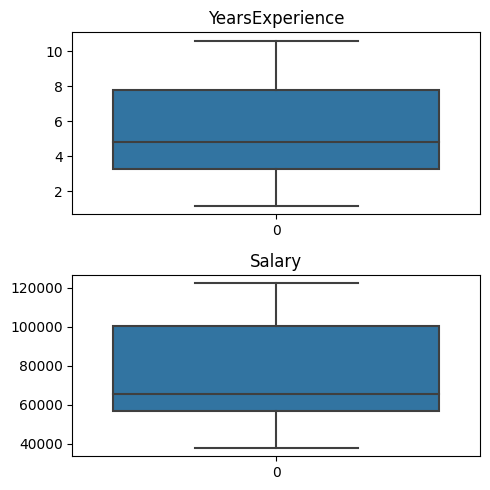

In [6]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['YearsExperience'], ax = axs[0])
plt2 = sns.boxplot(df['Salary'], ax = axs[1])
plt1.title.set_text('YearsExperience')
plt2.title.set_text('Salary')
plt.tight_layout()

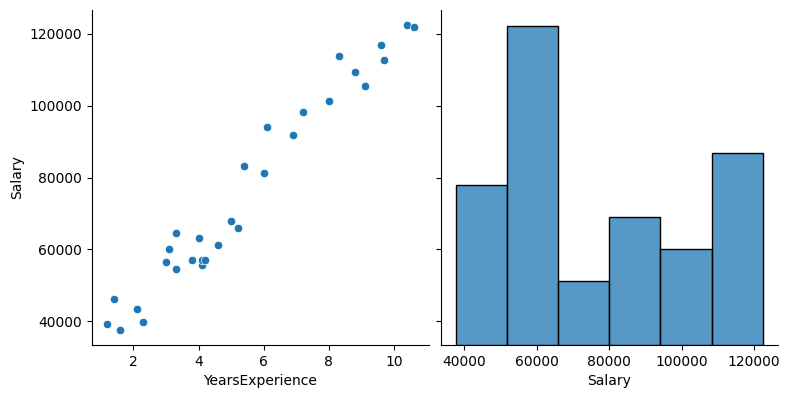

In [7]:
# The code above creates a scatterplot of the YearsExperience and Salary columns in the df dataframe. 
# It does this using the pairplot function from seaborn, which creates a scatterplot matrix.

sns.pairplot(df, x_vars=['YearsExperience', 'Salary'], y_vars='Salary', height=4, aspect=1, kind='scatter')
plt.show()

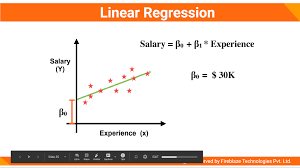

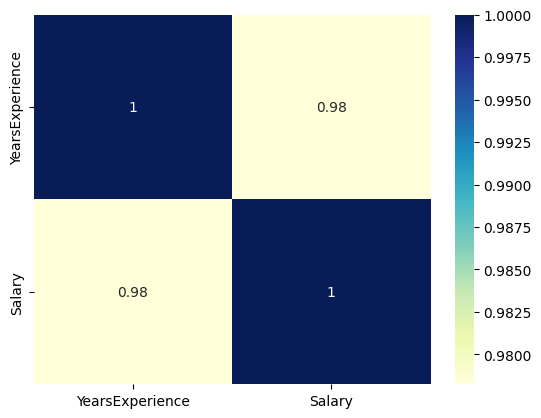

In [8]:
# This code creates a heatmap of the correlation between the columns of the data frame. It also annotates the values of the correlation.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [9]:
x = df[['YearsExperience']].values
y = df['Salary'].values

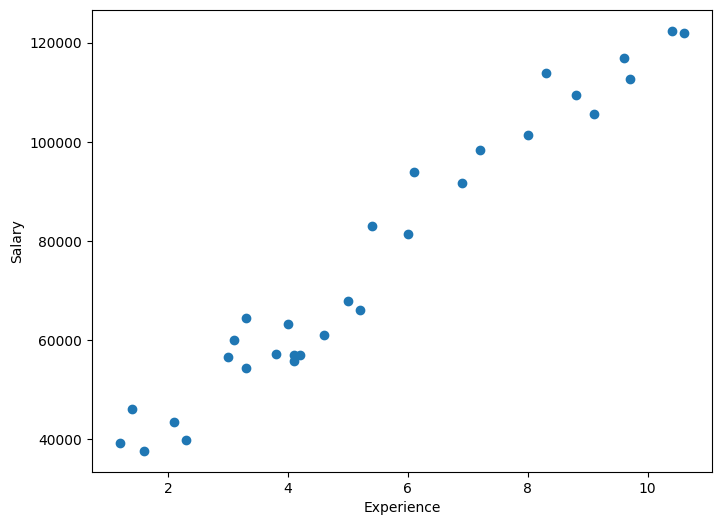

In [10]:
#plot scatter plot between salary and yearsExperience
plt.figure(figsize=(8,6))
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

Simple linear regression is a linear regression model with a single explanatory variable. <br>

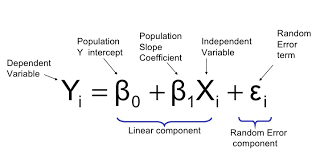

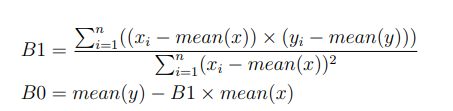

In [11]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_train) # Predicting the Train set results
y_pred2 = lr.predict(x_test) # Predicting the Test set results

In [12]:
print(y_pred2)
print(y_test)

[ 99058.79091752  88807.56562697  91603.35434257  81352.12905202
  52462.3123241  106514.22749247]
[101303.  91739.  98274.  93941.  56643. 109432.]


In [13]:
lr.coef_

array([9319.29571868])

In [14]:
lr.intercept_

24504.42516804079

In [15]:
#calculate MSE & R2 score of training data
print(mean_squared_error(y_train,y_pred1))
print(r2_score(y_train,y_pred1))

30527638.977760106
0.9597855249014814


In [16]:
#calculate MSE & R2 score of testing data
print(mean_squared_error(y_test,y_pred2))
print(r2_score(y_test,y_pred2))

40433085.49506386
0.8559102208819912


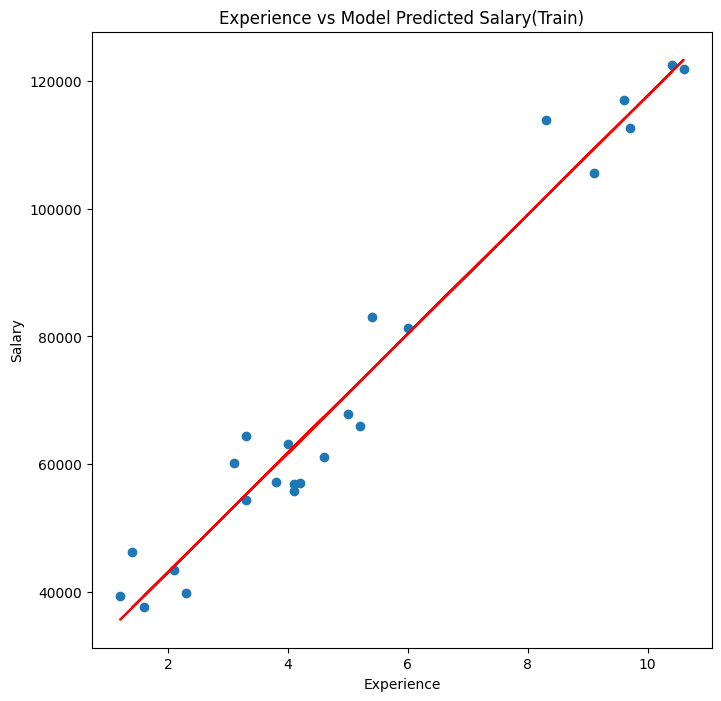

In [17]:
#plotting a scatter plot of Experience vs Model Predicted Salary in Training Data
plt.figure(figsize=(8,8))
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred1,color = "red")
plt.title('Experience vs Model Predicted Salary(Train)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

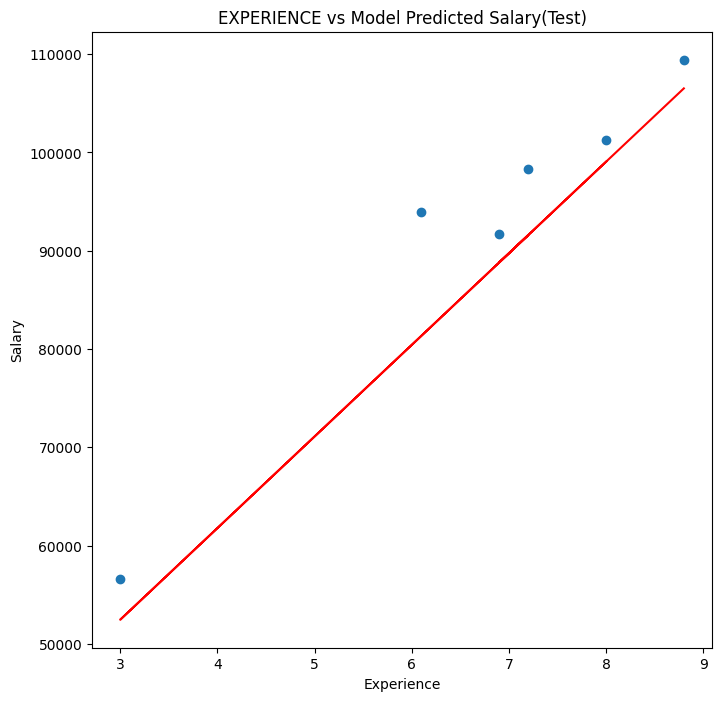

In [18]:
#plotting a scatter plot of Experience vs Model Predicted Salary in Test Data
plt.figure(figsize=(8,8))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred2,color = "red")
plt.title('EXPERIENCE vs Model Predicted Salary(Test)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()